[[[0.81480389 1.51072777 3.131818  ]
  [0.86349422 1.65247977 2.7467268 ]
  [0.32356835 2.93519053 3.29389897]
  [0.65192509 1.6977899  2.586583  ]
  [0.43083505 1.79163952 3.33015478]]

 [[0.5094934  1.34820028 2.03344783]
  [0.37448387 1.69912524 3.01635213]
  [0.28696385 2.91985837 3.57237279]
  [0.49935487 2.23753191 3.49331556]
  [0.17614073 1.57584652 4.26344723]]

 [[1.06441719 2.72221914 2.70638587]
  [0.89190053 3.75962988 2.12927456]
  [0.61347105 3.25883389 2.29101473]
  [0.69550179 2.06557417 4.28476194]
  [1.17129164 2.27922428 3.61807372]]]
(33, 3)
(33, 3)


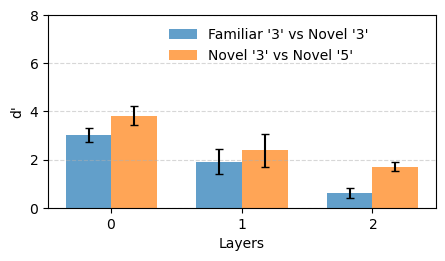

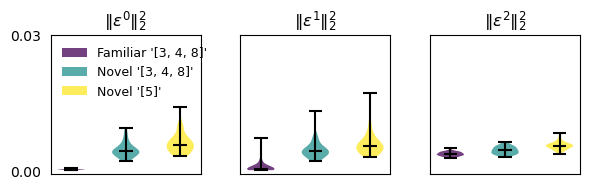

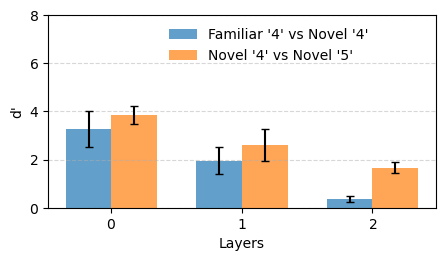

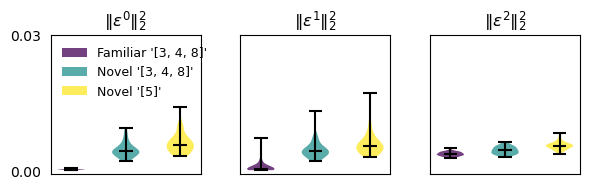

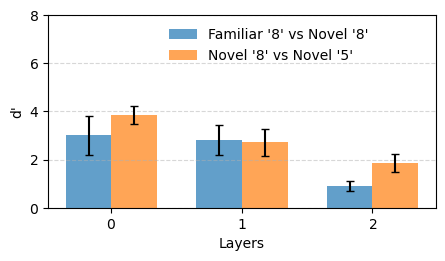

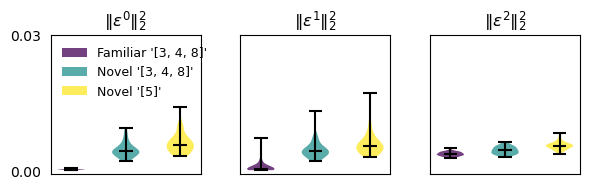

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os

save_path = os.path.join('results', 'hierarchical_models')

# cases with multiple base classes and a single test class
base_class = [3,4,8]; test_class = [5]
# base_class = [2,3,4,5,6,7,8,9,0]; test_class = [1]

is_fully_connected = False # set to False for locally connected hPCN

# Reconstruct the folder name and path using the parameters
if is_fully_connected:
    folder_name = f"base_{'_'.join(map(str, base_class))}_test_{'_'.join(map(str, test_class))}_fully_connected"
else:
    folder_name = f"base_{'_'.join(map(str, base_class))}_test_{'_'.join(map(str, test_class))}"

save_path = os.path.join(save_path, folder_name)

# Check if the folder exists and read from it
if not os.path.exists(save_path):
    print(f"Folder {save_path} does not exist.")


separability = np.load(os.path.join(save_path, 'separability.npz'))
separability_12 = separability['separability_12']
separability_23 = separability['separability_23']
# print(separability_12.shape, separability_23.shape)
# print(separability_12)

# x-axis locations for the groups
layers = np.arange(3)

# Width of the bars
bar_width = 0.35

energy = np.load(os.path.join(save_path, 'energy.npz'))
e_fam = energy['energy_fam']
e_nov = energy['energy_nov']
e_test_nov = energy['energy_test_nov']
print(e_fam.shape)
print(e_nov.shape)
e_fam


for digit_index, digit in enumerate(base_class):
    plt.figure(figsize=(5, 2.5))
    # plt.title(f"d' separability between classes of digits by layers")
    sep_12 = separability_12[digit_index]
    sep_23 = separability_23[digit_index]

    avg12 = np.mean(sep_12, axis=0)[::-1]
    std12 = np.std(sep_12, axis=0)[::-1]
    avg23 = np.mean(sep_23, axis=0)[::-1]
    std23 = np.std(sep_23, axis=0)[::-1]

    # Plotting the bars
    # plt.bar(layers - bar_width / 2, avg12, bar_width, yerr=yerr12,
    #         label=f'sep. between familiar {base_class} and novel {base_class}', capsize=5)
    # plt.bar(layers + bar_width / 2, avg23, bar_width, yerr=yerr23,
    #         label=f'sep. between novel {base_class} and novel {test_class}', capsize=5)
    plt.bar(layers - bar_width / 2, avg12, bar_width, yerr=std12,
            label=f"Familiar '{digit}' vs Novel '{digit}'", capsize=3, alpha=0.7)
    plt.bar(layers + bar_width / 2, avg23, bar_width, yerr=std23,
            label=f"Novel '{digit}' vs Novel '{test_class[0]}'", capsize=3, alpha=0.7)

    plt.ylabel("d'")
    plt.xlabel('Layers')
    plt.xticks(layers, [f'${i}$' for i in range(3)])
    # set the y-axis limits for uniform comparison across trials
    plt.ylim(0, 8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.legend(loc='upper center', bbox_to_anchor=(0.57, 1), frameon=False)
    plt.savefig(save_path + f'/separability_by_layers_digit={digit}.pdf', bbox_inches='tight')
    plt.show()
    plt.close()

    fig, ax = plt.subplots(1, 3, figsize=(6, 2), sharey=True)
    colors = plt.cm.viridis(np.linspace(0, 1, 3))
    for l in range(3):
        data = [e_fam[:, 2-l], e_nov[:, 2-l], e_test_nov[:, 2-l]]
        parts = ax[l].violinplot(data, showmeans=False, showmedians=True)
        # Coloring each violin plot
        for i, body in enumerate(parts['bodies']):
            body.set_facecolor(colors[i])
            # body.set_edgecolor('black')
            body.set_alpha(0.75)  # Set transparency

        # Set color for the other components: medians, caps, etc.
        parts['cmedians'].set_edgecolor('black')  # Set color of medians
        parts['cmaxes'].set_edgecolor('black')    # Set color of the max caps
        parts['cmins'].set_edgecolor('black')     # Set color of the min caps
        parts['cbars'].set_edgecolor('black')

        if l == 0:
            ax[l].legend([f"Familiar '{base_class}'", f"Novel '{base_class}'", f"Novel '{test_class}'"], loc='upper left', fontsize=9, frameon=False)

        ax[l].set_title(rf'$\Vert \varepsilon^{l} \Vert_2^2$')
        
        ax[l].set_xticks([])
        ax[l].yaxis.set_ticks_position('none') 
        ax[l].tick_params(axis='y', labelsize=10)

        # Set y tick labels
        ax[l].set_yticks([0, 0.03])

    plt.tight_layout()
    plt.savefig(save_path + '/energy_distribution.pdf', format = 'pdf' , bbox_inches='tight')
    plt.show()